#Downloading the dataset

In [16]:
%%capture
!unzip ../data/raw/ml-100k.zip

In [17]:
!cat ml-100k/README

SUMMARY & USAGE LICENSE

MovieLens data sets were collected by the GroupLens Research Project
at the University of Minnesota.
 
This data set consists of:
	* 100,000 ratings (1-5) from 943 users on 1682 movies. 
	* Each user has rated at least 20 movies. 
        * Simple demographic info for the users (age, gender, occupation, zip)

The data was collected through the MovieLens web site
(movielens.umn.edu) during the seven-month period from September 19th, 
1997 through April 22nd, 1998. This data has been cleaned up - users
who had less than 20 ratings or did not have complete demographic
information were removed from this data set. Detailed descriptions of
the data file can be found at the end of this file.

Neither the University of Minnesota nor any of the researchers
involved can guarantee the correctness of the data, its suitability
for any particular purpose, or the validity of results based on the
use of the data set.  The data set may be used for any research
purposes under th

#Reading data

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [19]:
data_columns = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_csv('ml-100k/u.data', names=data_columns, sep='\t')
ratings.head()

,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [20]:
ratings.drop('timestamp', axis=1, inplace=True)

In [21]:
u_cols = ['user_id','age','gender','occupation','zip_code']
users = pd.read_csv('ml-100k/u.user', names=u_cols, sep='|')
users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [22]:
s = """movie_id | movie_title | release_date | video_release_date |
              IMDb_URL | unknown | Action | Adventure | Animation |
              Children's | Comedy | Crime | Documentary | Drama | Fantasy |
              Film-Noir | Horror | Musical | Mystery | Romance | Sci-Fi |
              Thriller | War | Western |"""
column_names = [x.strip() for x in s.replace('\n', '').split(' |')][:-1]
movies = pd.read_csv('ml-100k/u.item', sep='|', encoding='latin-1', names=column_names)
movies.head(5)

,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [23]:
movies_cleaned = movies.drop(['release_date', 'video_release_date', 'IMDb_URL'], axis=1)
movies_cleaned['genres'] = ['|'.join([movies_cleaned.columns[i - 1] for i in range(1, movies_cleaned.shape[1]) if movies_cleaned.iloc[j, i] == 1]) for j in range(movies_cleaned.shape[0])]
movies_cleaned.drop(movies_cleaned.columns[2:-1], axis=1, inplace=True)
movies_cleaned.head(3)

,movie_id,movie_title,genres
0,1,Toy Story (1995),Adventure|Animation|Children's
1,2,GoldenEye (1995),unknown|Action|Sci-Fi
2,3,Four Rooms (1995),Sci-Fi


In [24]:
df_combined = pd.merge(ratings, movies_cleaned, on='movie_id')
df_combined

,user_id,movie_id,rating,movie_title,genres
0,196,242,3,Kolya (1996),Children's
1,63,242,3,Kolya (1996),Children's
2,226,242,5,Kolya (1996),Children's
3,154,242,3,Kolya (1996),Children's
4,306,242,5,Kolya (1996),Children's
...,...,...,...,...,...
99995,840,1674,4,Mamma Roma (1962),Documentary
99996,655,1640,3,"Eighth Day, The (1996)",Documentary
99997,655,1637,3,Girls Town (1996),Documentary
99998,655,1630,3,"Silence of the Palace, The (Saimt el Qusur) (1...",Documentary


In [25]:
df_combined = pd.merge(df_combined, users, on='user_id')
df_combined

,user_id,movie_id,rating,movie_title,genres,age,gender,occupation,zip_code
0,196,242,3,Kolya (1996),Children's,49,M,writer,55105
1,196,257,2,Men in Black (1997),unknown|Action|Children's|Romance,49,M,writer,55105
2,196,111,4,"Truth About Cats & Dogs, The (1996)",Children's|Mystery,49,M,writer,55105
3,196,25,4,"Birdcage, The (1996)",Children's,49,M,writer,55105
4,196,382,4,"Adventures of Priscilla, Queen of the Desert, ...",Children's|Documentary,49,M,writer,55105
...,...,...,...,...,...,...,...,...,...
99995,873,313,5,Titanic (1997),unknown|Documentary|Mystery,48,F,administrator,33763
99996,873,326,4,G.I. Jane (1997),unknown|Documentary|Thriller,48,F,administrator,33763
99997,873,348,3,Desperate Measures (1998),Comedy|Documentary|Sci-Fi,48,F,administrator,33763
99998,873,358,2,Spawn (1997),unknown|Action|Romance|Sci-Fi,48,F,administrator,33763


##Inspecting genres distribution

In [26]:
genres = {}

for genre in movies_cleaned['genres']:
    for word in genre.split('|'):
        genres[word] = genres.get(word, 0) + 1

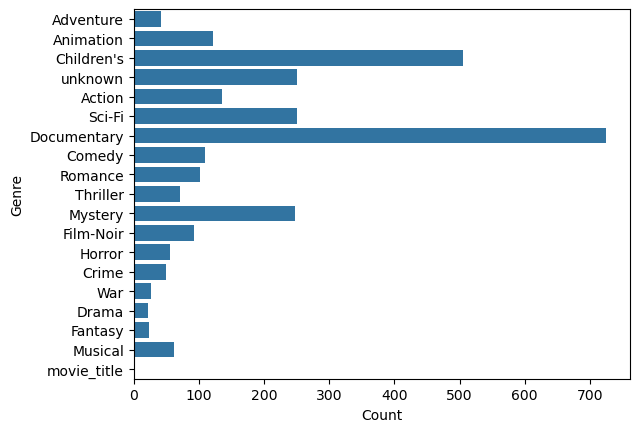

In [27]:
sns.barplot(y='Genre', x='Count', data=pd.DataFrame(list(genres.items()), columns=['Genre', 'Count']))
plt.show()

In [28]:
df_n_ratings = pd.DataFrame(df_combined.groupby('movie_title')['rating'].mean())
df_n_ratings['total ratings'] = pd.DataFrame(df_combined.groupby('movie_title')['rating'].count())
df_n_ratings.rename(columns = {'rating': 'mean ratings'}, inplace=True)

df_n_ratings.sort_values('total ratings', ascending=False).head(10)

,mean ratings,total ratings
movie_title,,
Star Wars (1977),4.358491,583
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


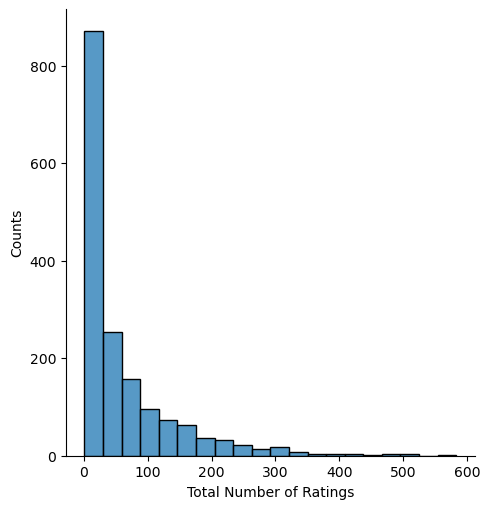

In [29]:
sns.displot(df_n_ratings['total ratings'].values, bins=20)
plt.xlabel('Total Number of Ratings')
plt.ylabel('Counts')
plt.show()

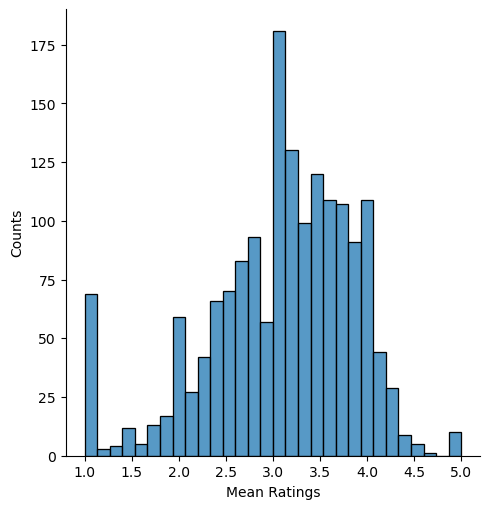

In [30]:
sns.displot(df_n_ratings['mean ratings'].values, bins=30)
plt.xlabel('Mean Ratings')
plt.ylabel('Counts')
plt.show()

#Saving the data

In [31]:
df_combined.to_csv('../data/interim/combined.csv', index=False)

#Cleaning up the directory

In [32]:
!rm -rf ml-100k